Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
('epoch:, ', '0001', ' cost = ', '2.576385108')
('epoch:, ', '0002', ' cost = ', '1.072589894')
('epoch:, ', '0003', ' cost = ', '0.856648478')
('epoch:, ', '0004', ' cost = ', '0.753083360')
('epoch:, ', '0005', ' cost = ', '0.688584651')
('epoch:, ', '0006', ' cost = ', '0.642893145')
('epoch:, ', '0007', ' cost = ', '0.608282274')
('epoch:, ', '0008', ' cost = ', '0.580402354')
('epoch:, ', '0009', ' cost = ', '0.557514496')
('epoch:, ', '0010', ' cost = ', '0.537580997')
('epoch:, ', '0011', ' cost = ', '0.520592697')
('epoch:, ', '0012', ' cost = ', '0.505975684')
('epoch:, ', '0013', ' cost = ', '0.492716662')
('epoch:, ', '0014', ' cost = ', '0.481139521')
('epoch:, ', '0015', ' cost = ', '0.470281405')
Learning finished
('Accuracy: ', 0.8917)
('Label: ', array([9]))
('Prediction: ', arra

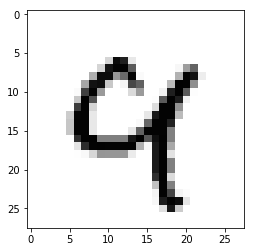

In [7]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
tf.set_random_seed(777) 
from tensorflow.examples.tutorials.mnist import input_data

nb_classes = 10
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

is_corrent = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_corrent, tf.float32))

training_epochs =  15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X:batch_xs, Y:batch_ys})
            avg_cost += c / total_batch
            
        print('epoch:, ', '%04d' % (epoch+1), ' cost = ', '{:.9f}'.format(avg_cost))
    
    
    print("Learning finished")

    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()
        


